In [158]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv
import requests
import json
import gmaps


# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [159]:
print("The data consisted of two .csvs: one that had player data and one that had seasons.")
print(f"The player data had {unique_player} players that came from {unique_college} unique colleges. The NBA start years ranged from {minStartyear} to {latestStartyear}. The average age of the players entering the NBA over that time is {averageStartage}, though the average age has come down from {firstYearAverageAge} to {currentYearAverageAge} this year. One tidbit: the mode of the player count by college is {modeCollege}, which makes sense because {singleCollege_sum} of the colleges only sent one player to the NBA! ")

The data consisted of two .csvs: one that had player data and one that had seasons.
The player data had 4503 players that came from 472 unique colleges. The NBA start years ranged from 1947.0 to 2018.0. The average age of the players entering the NBA over that time is 23.93, though the average age has come down from 26.59 to 23.44 this year. One tidbit: the mode of the player count by college is 1, which makes sense because 169 of the colleges only sent one player to the NBA! 


In [185]:
# File to Load
player_data_to_load = os.path.join("player_data_cleaned.csv")
seasons_data_to_load = os.path.join("Seasons_stats.csv")
budgets_data_to_load = os.path.join("ope_ed_gov_schools_2017.csv")

# Read the City and Ride Data
player_data_df = pd.read_csv(player_data_to_load, encoding="UTF-8")
seasons_data_df = pd.read_csv(seasons_data_to_load, encoding="UTF-8")
budget2017_data_df = pd.read_csv(budgets_data_to_load, encoding="UTF-8")

# Combine the data into a single dataset
#pyber_data_complete = pd.merge(city_data, ride_data, how="left", on=["city", "city"])

#pyber_data_complete.to_csv("testData.csv", index=False, header=True)

# Display the data table for preview
player_data_df.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991.0,1995.0,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969.0,1978.0,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970.0,1989.0,C,7-2,225.0,"April 16, 1947",University of California-Los Angeles
3,Mahmoud Abdul-Rauf,1991.0,2001.0,G,6-1,162.0,"March 9, 1969",Louisiana State University and Agricultural & ...
4,Tariq Abdul-Wahad,1998.0,2003.0,F,6-6,223.0,"November 3, 1974",San Jose State University


In [186]:
#University of California, Los Angeles	University of California-Los Angeles#
#University of North Carolina	University of North Carolina at Chapel Hill
#Indiana University	Indiana University-Bloomington
#St. John's University	St John's University-New York
#University of Michigan	University of Michigan-Ann Arbor
#Ohio State University	Ohio State University-Main Campus
#North Carolina State University	North Carolina State University at Raleigh
#University of Minnesota	University of Minnesota-Twin Cities
#University of Maryland	University of Maryland-College Park
#Louisiana State University	Louisiana State University and Agricultural & Mechanical College
#Georgia Institute of Technology	Georgia Institute of Technology-Main Campus
#University of Nevada, Las Vegas	University of Nevada-Las Vegas

In [187]:
#Number of unique colleges
unique_college = player_data_df['college'].nunique()
unique_college

472

In [188]:
# Inspect budget data from U.S. Department of Education 2017 https://ope.ed.gov/athletics/#/datafile/list
budget2017_data_df.head()

,unitid,institution_name,addr1_txt,addr2_txt,city_txt,state_cd,zip_text,ClassificationCode,classification_name,ClassificationOther,...,EXP_MEN,EXP_WOMEN,TOTAL_EXP_MENWOMEN,EXP_COED_MEN,EXP_COED_WOMEN,TOTAL_EXP_COED,EXPENSE_MENALL,EXPENSE_WOMENALL,TOTAL_EXPENSE_ALL,Sports
0,100654,Alabama A & M University,4900 Meridian Street,NaN,Normal,AL,35762.0,2,NCAA Division I-FCS,NaN,...,516227.0,NaN,516227.0,NaN,NaN,NaN,516227,0,516227,Baseball
1,100654,Alabama A & M University,4900 Meridian Street,NaN,Normal,AL,35762.0,2,NCAA Division I-FCS,NaN,...,824939.0,869729.0,1694668.0,NaN,NaN,NaN,824939,869729,1694668,Basketball
2,100654,Alabama A & M University,4900 Meridian Street,NaN,Normal,AL,35762.0,2,NCAA Division I-FCS,NaN,...,232691.0,366033.0,598724.0,NaN,NaN,NaN,232691,366033,598724,All Track Combined
3,100654,Alabama A & M University,4900 Meridian Street,NaN,Normal,AL,35762.0,2,NCAA Division I-FCS,NaN,...,2996306.0,NaN,2996306.0,NaN,NaN,NaN,2996306,0,2996306,Football
4,100654,Alabama A & M University,4900 Meridian Street,NaN,Normal,AL,35762.0,2,NCAA Division I-FCS,NaN,...,117942.0,NaN,117942.0,NaN,NaN,NaN,117942,0,117942,Golf


In [209]:
budget2017_data_basketball_df = budget2017_data_df[['institution_name','classification_name', 'REVENUE_MENALL', 'EXPENSE_MENALL','Sports']].where(budget2017_data_df['Sports'] == 'Basketball').copy()
budget2017_data_basketball_df.dropna().head()


,institution_name,classification_name,REVENUE_MENALL,EXPENSE_MENALL,Sports
1,Alabama A & M University,NCAA Division I-FCS,824939.0,824939.0,Basketball
11,University of Alabama at Birmingham,NCAA Division I-FBS,3369190.0,3357016.0,Basketball
22,University of Alabama in Huntsville,NCAA Division II without football,678342.0,678342.0,Basketball
31,Alabama State University,NCAA Division I-FCS,815998.0,815998.0,Basketball
41,The University of Alabama,NCAA Division I-FBS,15003656.0,9681264.0,Basketball


In [190]:
minStartyear = player_data_df['year_start'].min()
minStartyear

1947.0

In [191]:
latestStartyear = player_data_df['year_start'].max()
latestStartyear

2018.0

In [192]:
#Number of unique players
unique_player = player_data_df['name'].nunique()
unique_player

4503

In [193]:
playerYears_df = player_data_df[['year_start','birth_date']].copy()
playerYears_df.head()

,year_start,birth_date
0,1991.0,"June 24, 1968"
1,1969.0,"April 7, 1946"
2,1970.0,"April 16, 1947"
3,1991.0,"March 9, 1969"
4,1998.0,"November 3, 1974"


In [194]:
#Birth year
#playerYears_df['birth_date'] = pd.to_datetime(playerYears_df['birth_date']).dt.year
playerYears_df['birth_date'] = pd.to_datetime(playerYears_df['birth_date']).dt.year

playerYears_df.head()

,year_start,birth_date
0,1991.0,1968.0
1,1969.0,1946.0
2,1970.0,1947.0
3,1991.0,1969.0
4,1998.0,1974.0


In [195]:
playerYears_df['entryAge'] = playerYears_df['year_start'] - playerYears_df['birth_date']
playerYears_df.head()

,year_start,birth_date,entryAge
0,1991.0,1968.0,23.0
1,1969.0,1946.0,23.0
2,1970.0,1947.0,23.0
3,1991.0,1969.0,22.0
4,1998.0,1974.0,24.0


In [196]:
averageStartage = playerYears_df['entryAge'].mean()
averageStartage = np.round(averageStartage, decimals=2)
averageStartage

23.93

In [197]:
#ageYeargroup = playerYears_df.groupby('year_start')
ageYeargroup = playerYears_df.groupby(['year_start'], as_index=False).agg({'entryAge':'mean'}).rename(columns={'entryAge':'AverAge'})
ageYeargroup.head()

,year_start,AverAge
0,1947.0,26.594937
1,1948.0,26.075000
2,1949.0,26.329787
3,1950.0,26.025000
4,1951.0,24.666667


In [198]:
firstYearAverageAge = ageYeargroup.iloc[0]['AverAge']
firstYearAverageAge = np.round(firstYearAverageAge, decimals=2)
firstYearAverageAge

26.59

In [199]:
currentYearAverageAge = ageYeargroup.iloc[-1]['AverAge']
currentYearAverageAge = np.round(currentYearAverageAge, decimals=2)
currentYearAverageAge

23.44

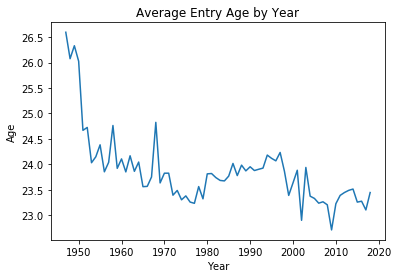

In [200]:
year_strt = ageYeargroup['year_start']
AverAge = ageYeargroup['AverAge']
plt.title("Average Entry Age by Year")
plt.xlabel("Year")
plt.ylabel("Age")

plt.plot(year_strt, AverAge)
plt.show()

In [201]:
playerGrouped = player_data_df.groupby('college').count()
countByCollege = player_data_df.groupby(['college'], as_index=False).agg({'name':'count'}).rename(columns={'name':'count'})
countByCollege.head()

,college,count
0,Acadia University,1
1,Alabama - Huntsville,1
2,Alabama A&M University,1
3,Alabama State University,2
4,Albany State University,5


In [202]:
#singleCollege = countByCollege.groupby('count').size()
singleCollege = countByCollege.loc[countByCollege['count'] == 1]
singleCollege_sum = singleCollege['college'].count()
singleCollege_sum

169

In [203]:
top25colleges = countByCollege.sort_values(by = 'count', ascending=False).head(25)
top25colleges = top25colleges.reset_index(drop=True)
top25colleges.head()

,college,count
0,University of Kentucky,99
1,University of California-Los Angeles,91
2,University of North Carolina at Chapel Hill,87
3,University of Kansas,72
4,Duke University,71


In [204]:
modeCollege_df = countByCollege['count'].sort_values(ascending=False)
modeCollege_df = modeCollege_df.reset_index(drop=True)
modeCollege = modeCollege_df.mode()
modeCollege = modeCollege.iloc[0]
modeCollege

1

<BarContainer object of 25 artists>

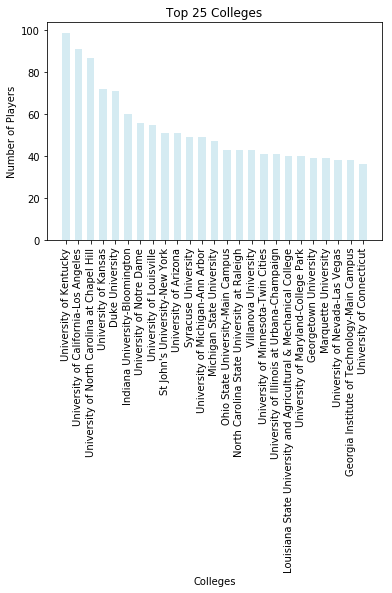

In [205]:
bar25colleges = top25colleges['college']
bar25count = top25colleges['count']
width = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125]

plt.title("Top 25 Colleges")
plt.xlabel("Colleges")
plt.ylabel("Number of Players")
plt.xticks(rotation=90)
top25colleges['college']

plt.xticks(width, bar25colleges)
plt.bar(width, bar25count, color='lightblue', alpha=0.5, align="center", width=3)

In [206]:
plt.savefig("top25colleges.png")

<Figure size 432x288 with 0 Axes>

In [210]:
#budget2017_data_basketball_df
#top25colleges['college']


college_data_merged = pd.merge(top25colleges, budget2017_data_basketball_df, how="left", left_on="college", right_on="institution_name")
college_data_merged

,college,count,institution_name,classification_name,REVENUE_MENALL,EXPENSE_MENALL,Sports
0,University of Kentucky,99,University of Kentucky,NCAA Division I-FBS,27965227.0,19180059.0,Basketball
1,University of California-Los Angeles,91,University of California-Los Angeles,NCAA Division I-FBS,13416856.0,9856861.0,Basketball
2,University of North Carolina at Chapel Hill,87,University of North Carolina at Chapel Hill,NCAA Division I-FBS,21408475.0,10293415.0,Basketball
3,University of Kansas,72,University of Kansas,NCAA Division I-FBS,18266319.0,11126047.0,Basketball
4,Duke University,71,Duke University,NCAA Division I-FBS,34398285.0,19507686.0,Basketball
5,Indiana University-Bloomington,60,Indiana University-Bloomington,NCAA Division I-FBS,24560829.0,12855019.0,Basketball
6,University of Notre Dame,56,University of Notre Dame,NCAA Division I-FBS,3896784.0,6793853.0,Basketball
7,University of Louisville,55,University of Louisville,NCAA Division I-FBS,43960492.0,17065364.0,Basketball
8,St John's University-New York,51,St John's University-New York,NCAA Division I without football,8323127.0,8323127.0,Basketball
9,University of Arizona,51,University of Arizona,NCAA Division I-FBS,23434825.0,9852596.0,Basketball


<BarContainer object of 25 artists>

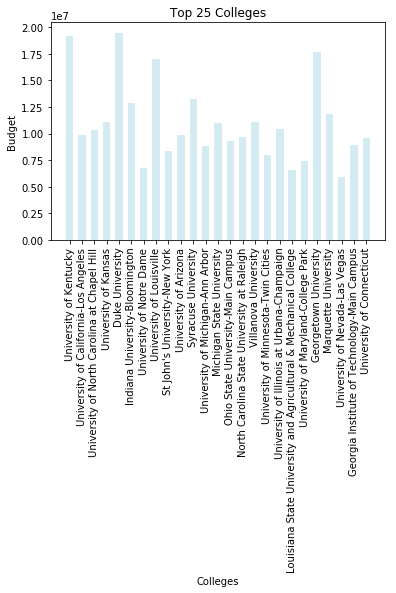

In [211]:
#budget2017_data_basketball_df.dtypes
#top25colleges.dtypes

budget25colleges = college_data_merged['college']
budget = college_data_merged['EXPENSE_MENALL']
width = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125]

plt.title("Top 25 Colleges")
plt.xlabel("Colleges")
plt.ylabel("Budget")
plt.xticks(rotation=90)
#top25colleges['college']

plt.xticks(width, budget25colleges)
plt.bar(width, budget, color='lightblue', alpha=0.5, align="center", width=3)




In [184]:
sortedcolleges = countByCollege.sort_values(by = 'count', ascending=False)
sortedcolleges = sortedcolleges.reset_index(drop=True)
#sortedcolleges.head()

In [26]:
#sortedcolleges.to_csv("college_playercount.csv")

In [27]:
top25colleges

,college,count
0,University of Kentucky,99
1,"University of California, Los Angeles",91
2,University of North Carolina,87
3,University of Kansas,72
4,Duke University,71
5,Indiana University,60
6,University of Notre Dame,56
7,University of Louisville,55
8,St. John's University,51
9,University of Arizona,51


In [28]:
college_group = player_data_df[['college', 'year_start', 'name']].copy()
college_group = college_group
college_group_players = college_group[['college', 'year_start', 'name']].groupby(['college', 'year_start']).count()
college_group_players = college_group_players.unstack(level=1)

cols = [college_group_players.columns[-1]] + [col for col in college_group_players if col != college_group_players.columns[-1]]
college_group_players = college_group_players[cols]

college_group_players.columns = college_group_players.columns.droplevel(0) 
college_group_players = college_group_players.rename_axis(None).rename_axis([None], axis=1)

college_group_players_sorted = college_group_players.reindex(sorted(college_group_players.columns), axis=1)

college_group_players_sorted = college_group_players_sorted.reset_index().rename(columns={'index':'College'})


college_group_players_sorted.head()

,College,1947,1948,1949,1950,1951,1952,1953,1954,1955,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Acadia University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama - Huntsville,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,Alabama A&M University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama State University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albany State University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
college_group_players_sorted['Total'] = college_group_players_sorted.sum(axis=1)
college_group_players_sorted25 = college_group_players_sorted.sort_values(by = 'Total', ascending=False).head(25)
college_group_players_sorted25 = college_group_players_sorted25.reset_index(drop=True)
college_group_players_sorted25

,College,1947,1948,1949,1950,1951,1952,1953,1954,1955,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
0,University of Kentucky,1.0,2.0,1.0,7.0,NaN,NaN,NaN,NaN,3.0,...,1.0,4.0,4.0,6.0,1.0,3.0,5.0,5.0,4.0,99.0
1,"University of California, Los Angeles",NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,...,2.0,NaN,2.0,NaN,1.0,6.0,2.0,NaN,3.0,91.0
2,University of North Carolina,2.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,...,4.0,1.0,NaN,4.0,1.0,2.0,NaN,1.0,3.0,87.0
3,University of Kansas,1.0,NaN,3.0,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,3.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,72.0
4,Duke University,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,1.0,NaN,3.0,3.0,3.0,3.0,3.0,3.0,2.0,71.0
5,Indiana University,1.0,NaN,4.0,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,2.0,1.0,NaN,2.0,2.0,60.0
6,University of Notre Dame,3.0,1.0,3.0,4.0,1.0,NaN,NaN,NaN,1.0,...,NaN,1.0,NaN,2.0,NaN,1.0,2.0,1.0,NaN,56.0
7,University of Louisville,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,...,2.0,1.0,1.0,NaN,3.0,1.0,2.0,1.0,2.0,55.0
8,St. John's University,5.0,NaN,2.0,2.0,1.0,1.0,3.0,NaN,1.0,...,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,51.0
9,University of Arizona,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,2.0,1.0,1.0,NaN,1.0,3.0,3.0,NaN,3.0,51.0


In [30]:
college_group = player_data_df[['college', 'year_start', 'name']].copy()
college_group = college_group
college_group_players = college_group[['college', 'year_start', 'name']].groupby(['college', 'year_start']).count().reset_index()
college_group_players.head()

college_group_players.head()

,college,year_start,name
0,Acadia University,1970,1
1,Alabama - Huntsville,2018,1
2,Alabama A&M University,2012,1
3,Alabama State University,1970,1
4,Alabama State University,1982,1


In [31]:
college_group_players.to_csv("college_group_count.csv")

Text(0,0.5,'Number of Players')

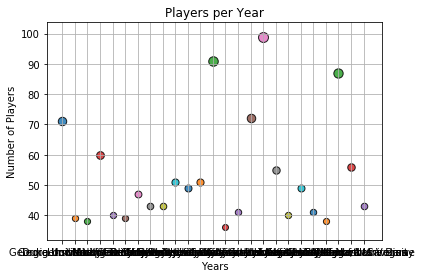

In [32]:
# Create new dataframe group just by type to plot
grouped = college_group_players_sorted25.groupby('College')

# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types

#fig, ax = plt.subplots()
#colors = ["goldenrod","lightblue","lightcoral"] c=colors[color_index],
#color_index = 0
for name, group in grouped:
    plt.scatter(group.College, group.Total, marker='o', s=group.Total, label=name, edgecolors="black", alpha=0.85)
    #color_index += 1
    
# Incorporate the other graph properties    
plt.grid(True)
#plt.ylim(18,44)
#plt.xlim(1,44)
plt.title("Players per Year")
plt.xlabel("Years")
plt.ylabel("Number of Players")

# Create a legend
#plt.legend(title='City Types', markerscale=0.3)

# Incorporate a text label regarding circle size
#plt.annotate(" Note:", xy=(44, 32))
#plt.annotate(" Circle size correlates with driver count per city.", xy=(44, 30))
#
# Save Figure
#plt.savefig("pyber_scatter.png", bbox_inches="tight")


In [33]:
top25colleges["Lat"] = ""
top25colleges["Lng"] = ""
top25colleges

,college,count,Lat,Lng
0,University of Kentucky,99,,
1,"University of California, Los Angeles",91,,
2,University of North Carolina,87,,
3,University of Kansas,72,,
4,Duke University,71,,
5,Indiana University,60,,
6,University of Notre Dame,56,,
7,University of Louisville,55,,
8,St. John's University,51,,
9,University of Arizona,51,,


In [34]:
# create a params dict that will be updated with new city each iteration
params2 = {"key": gkey}

# Loop through the cities_pd and run a lat/long search for each city
for index, row in top25colleges.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    city = row['college']

    # update address key value
    params2['address'] = city

    # make request
    cities_lat_lng = requests.get(base_url, params=params2)
    
    # print the cities_lat_lng url, avoid doing for public github repos in order to avoid exposing key
    # print(cities_lat_lng.url)
    
    # convert to json
    cities_lat_lng = cities_lat_lng.json()

    top25colleges.loc[index, "Lat"] = cities_lat_lng["results"][0]["geometry"]["location"]["lat"]
    top25colleges.loc[index, "Lng"] = cities_lat_lng["results"][0]["geometry"]["location"]["lng"]

# Visualize to confirm lat lng appear
top25colleges

,college,count,Lat,Lng
0,University of Kentucky,99,38.0307,-84.504
1,"University of California, Los Angeles",91,34.0689,-118.445
2,University of North Carolina,87,35.9049,-79.0469
3,University of Kansas,72,38.9543,-95.2558
4,Duke University,71,36.0014,-78.9382
5,Indiana University,60,39.1784,-86.5133
6,University of Notre Dame,56,41.7056,-86.2353
7,University of Louisville,55,38.2123,-85.7585
8,St. John's University,51,40.7221,-73.7942
9,University of Arizona,51,32.2319,-110.95


In [36]:
top25colleges.to_csv("output-latlong-25.csv")

In [37]:
# Store latitude and longitude in locations
locations = top25colleges[["Lat", "Lng"]]

# Fill NaN values and convert to float
count = top25colleges["count"].astype(float)

In [38]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=count, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))